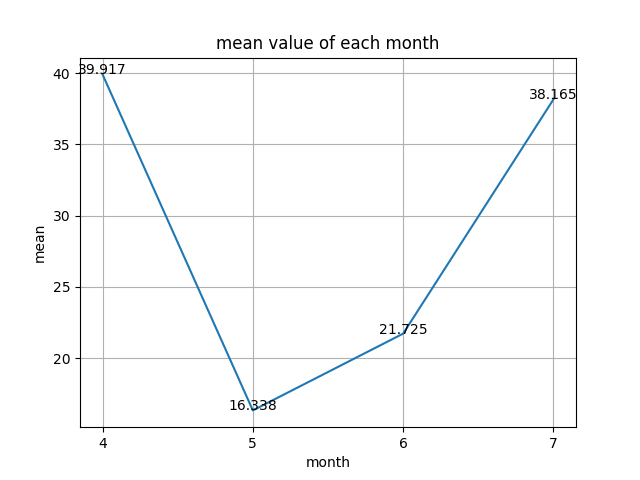

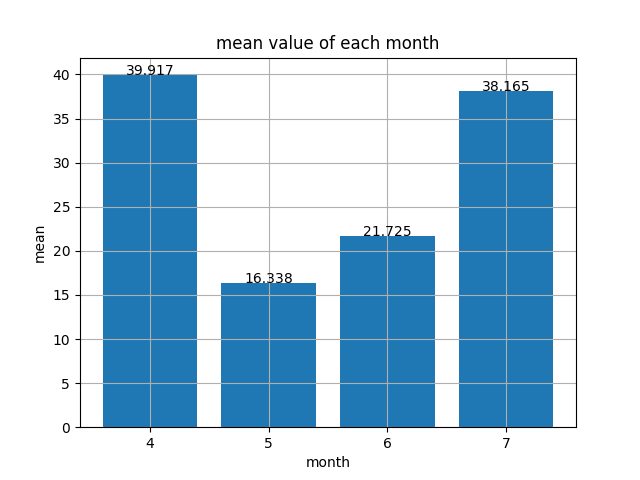

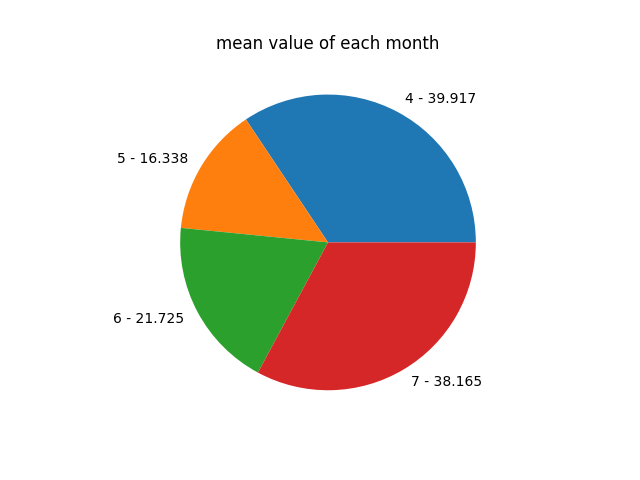

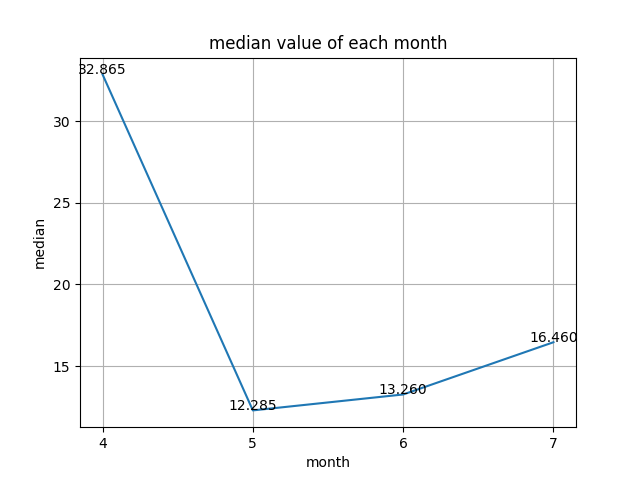

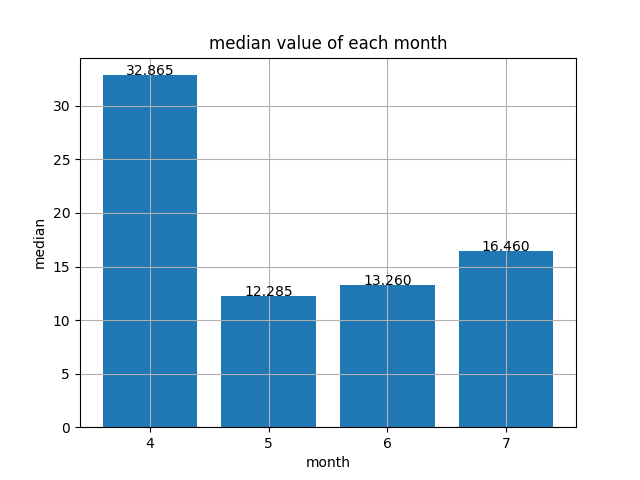

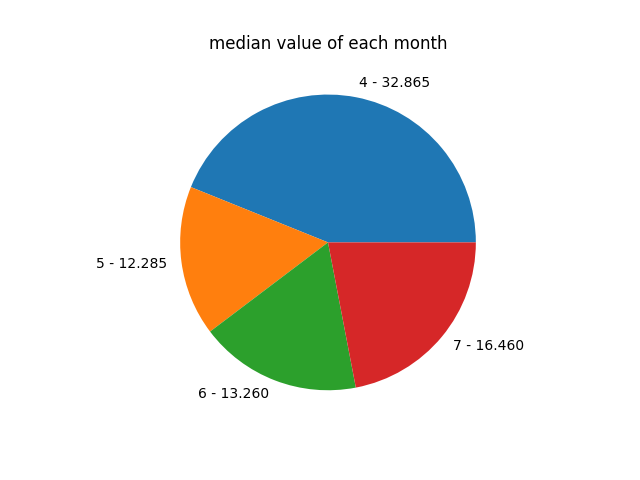

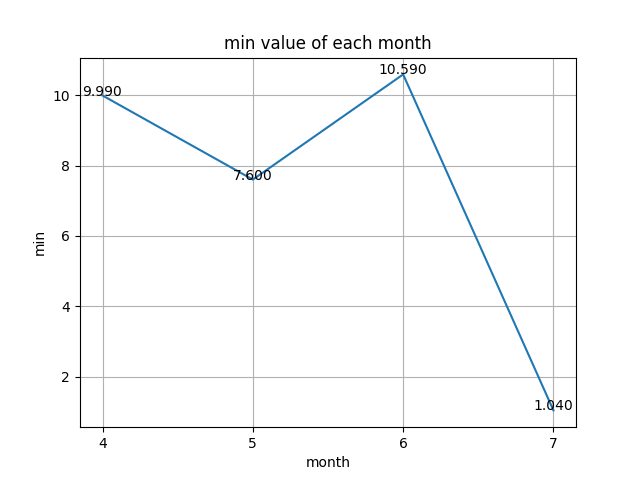

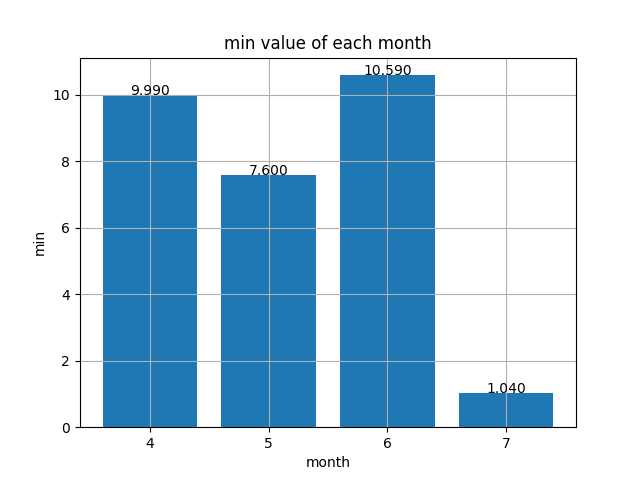

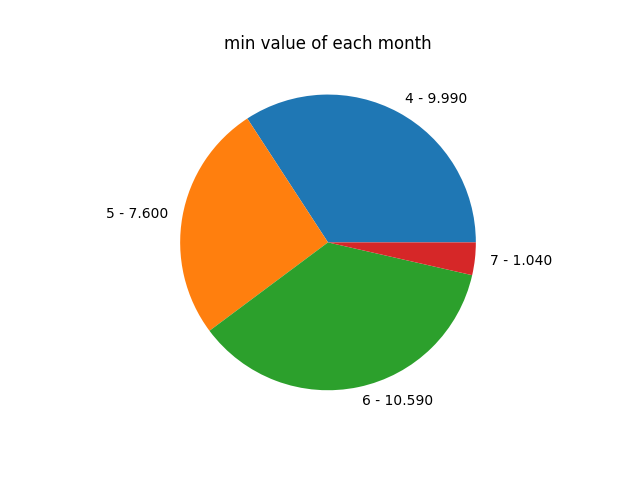

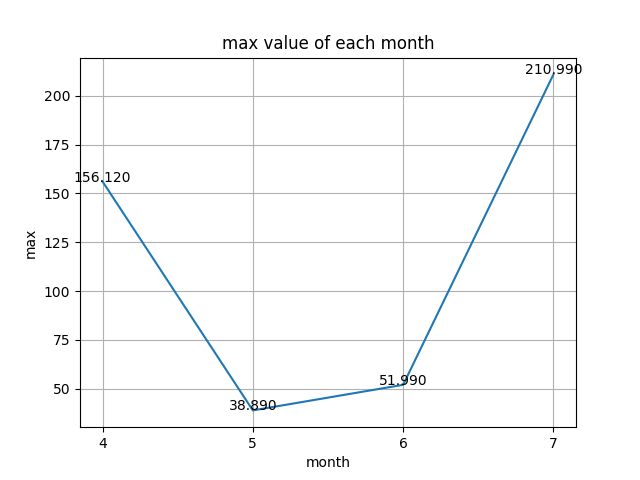

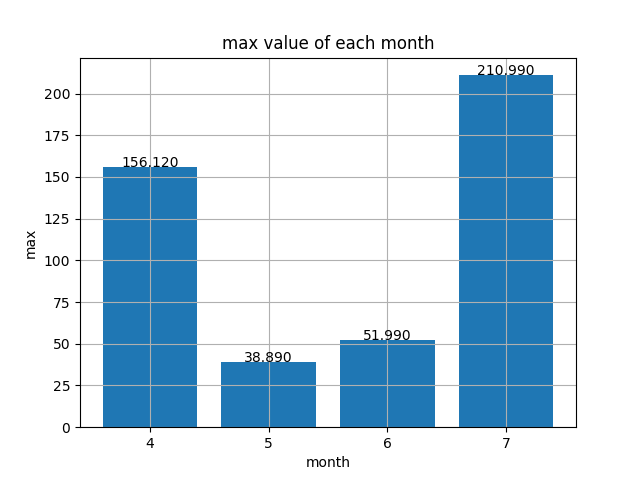

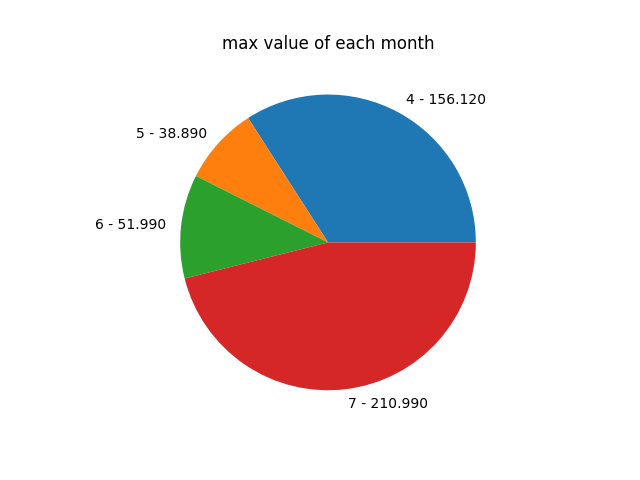

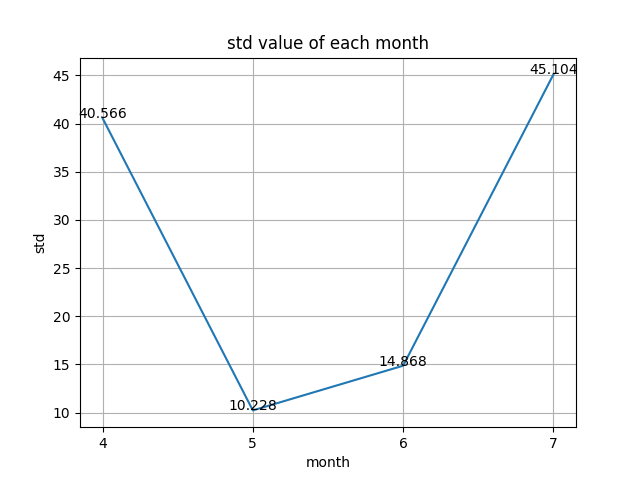

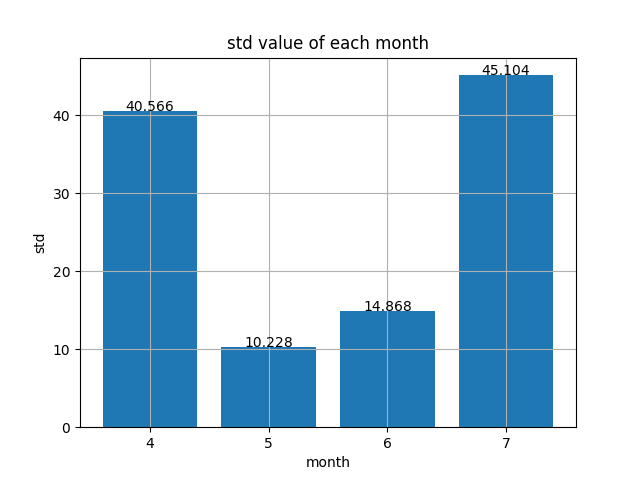

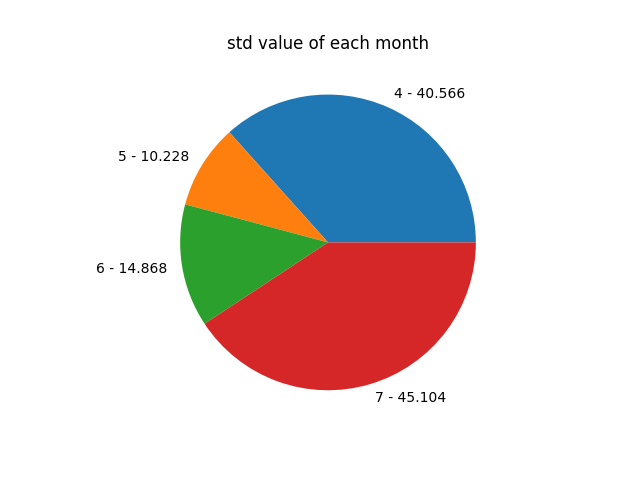

month	4	5	6	7
mean	39.917	16.338	21.725	38.165
median	32.865	12.285	13.260	16.460
min	9.990	7.600	10.590	1.040
max	156.120	38.890	51.990	210.990
std	40.566	10.228	14.868	45.104


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def read_file(filename):
   
    f = open(filename, "r")
    lines = f.readlines()
    f.close()

    dic = {4:[], 5:[], 6:[], 7:[]}

    for i in range(1, len(lines)):
        line = lines[i].strip()
        if line:
            words = line.split(",")
            date = words[0]
            money = words[20]

            # split the data by "/", month is first field
            month = int(date.split("/")[0])

            # skip the "$" at the beginning
            money = float(money[1:])
            # print(month, money)
            # add to dict
            dic[month].append(money)

    return dic



def draw_image(month, data, xname):

    plt.figure()
    # plot data
    plt.plot(month, data)
    # draw text
    for xpos, ypos in zip(month, data):
        plt.text(xpos, ypos, f"{ypos:.3f}", horizontalalignment="center", verticalalignment="baseline")
    # draw x and y label
    plt.xticks(month,month)
    plt.xlabel("month")
    plt.ylabel(xname)
    plt.grid(True)
    # set title
    plt.title(f"{xname} value of each month")
    plt.savefig(f"{xname}_plot.png")
    plt.show()


    plt.figure()
    # plot data
    plt.bar(month, data)
    # draw text
    for xpos, ypos in zip(month, data):
        plt.text(xpos, ypos, f"{ypos:.3f}", horizontalalignment="center", verticalalignment="baseline")
    # draw x and y label
    plt.xticks(month,month)
    plt.xlabel("month")
    plt.ylabel(xname)
    plt.grid(True)
    # set title
    plt.title(f"{xname} value of each month")
    plt.savefig(f"{xname}_bar.png")
    plt.show()

    plt.figure()
    # plot data
    labels = [f"{m} - {d:.3f}" for d, m in zip(data, month)]
    plt.pie(x = data, labels = labels)
    plt.title(f"{xname} value of each month")
    plt.savefig(f"{xname}_pie.png")
    plt.show()

filename = "amazon-orders.csv"
dic = read_file(filename)
# print(dic)


months = [4,5,6,7]
mean_lst, median_lst, min_lst, max_lst, std_lst = [], [], [], [], []
for month in months:

    # caclulate 5 kinds of statistics
    data = np.array(dic[month])

    mean_lst.  append(np.mean(data))
    median_lst.append(np.median(data))
    min_lst.   append(np.min(data))
    max_lst.   append(np.max(data))
    std_lst.   append(np.std(data))

# draw image
draw_image(months, mean_lst, "mean")
draw_image(months, median_lst, "median")
draw_image(months, min_lst, "min")
draw_image(months, max_lst, "max")
draw_image(months, std_lst, "std")

# show output
print("month",  "\t".join([f"{i    }" for i in months]), sep = "\t")
print("mean",   "\t".join([f"{i:.3f}" for i in mean_lst]), sep = "\t")
print("median", "\t".join([f"{i:.3f}" for i in median_lst]), sep = "\t")
print("min",    "\t".join([f"{i:.3f}" for i in min_lst]), sep = "\t")
print("max",    "\t".join([f"{i:.3f}" for i in max_lst]), sep = "\t")
print("std",    "\t".join([f"{i:.3f}" for i in std_lst]), sep = "\t")
